<img src='../OUTILS/bandeau_MF.png' align='right' width='100%'/>

<div class="alert alert-info alert-success">
<h3>Elaboration de la RGB Cloud Type - FCI /MTG </h3></div>

## <a id='TOC-TOP'></a>Contenus

<div class="alert alert-block alert-warning">
    
<b>PREREQUIS </b>
    
Ce Notebook ne nécessite pas de prérequis 

</div>
<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1.Tout d'abord, il faut procéder à l'importation des librairies nécessaires.

</div>

In [1]:
from PIL import Image
from IPython.display import display, HTML
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import subprocess
import sys
import os
from osgeo import gdal
from PIL import Image
os.environ['PATH'] = f"/opt/conda/env_MF_stage/bin:{os.environ['PATH']}" 
os.environ['GDAL_DATA'] = '/opt/conda/env_MF_stage/share/gdal'
os.environ['PROJ_LIB'] = '/opt/conda/env_MF_stage/share/proj'

In [2]:
download_dir = os.path.join(os.getcwd(), "../RESULTS")
os.makedirs(download_dir, exist_ok=True)

In [3]:
input = '/stockage/DATA/Mmultic_mtg/Mmultic2kmNC4_mtgi1_202410091200.nc'

In [4]:
input

'/stockage/DATA/Mmultic_mtg/Mmultic2kmNC4_mtgi1_202410091200.nc'

In [5]:
pwd

'/home/coster/MF_DATA_MANIPULATION/NOTEBOOK'

### Définition du dossier de sortie :

In [6]:
download_dir = os.path.join(os.getcwd(), "../RESULTS")
os.makedirs(download_dir, exist_ok=True)

In [7]:
output = '../RESULTS'

In [8]:
output

'../RESULTS'

In [9]:
!gdalinfo /stockage/DATA/Mmultic_mtg/Mmultic2kmNC4_mtgi1_202410091200.nc

Driver: netCDF/Network Common Data Format
Files: /stockage/DATA/Mmultic_mtg/Mmultic2kmNC4_mtgi1_202410091200.nc
Size is 512, 512
Metadata:
  NC_GLOBAL#Area_of_acquisition=globe
  NC_GLOBAL#cdm_data_type=NetCDF
  NC_GLOBAL#comment=Status experimental
  NC_GLOBAL#Conventions=CF-1.5
  NC_GLOBAL#converted_by=Sat2Netcdf Version 1.0
  NC_GLOBAL#creator_email=meteo-spatiale@meteo.fr
  NC_GLOBAL#creator_name=CMS-Lannion
  NC_GLOBAL#creator_url=http://www.meteo-spatiale.fr
  NC_GLOBAL#date_created=2024-10-09 12:15
  NC_GLOBAL#Exploration_mode=0
  NC_GLOBAL#geospatial_lat_max=81.172699
  NC_GLOBAL#geospatial_lat_min=-81.172699
  NC_GLOBAL#geospatial_lon_max=81.172699
  NC_GLOBAL#geospatial_lon_min=-81.172699
  NC_GLOBAL#geospatial_vertical_max=0
  NC_GLOBAL#geospatial_vertical_min=0
  NC_GLOBAL#history=Created on 2024-10-09 12:15 by CMS-Lannion  : Sat2Netcdf -ncml file:/A3/mtg/app/NC2NetcdfFdhsi/produits/mtgi1.ncml cycle_mtgi1_20241009_120000/NCTrail.nc
  NC_GLOBAL#id=20241009_20000
  NC_GLOBAL#

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2.Extraction des données dans le NetCDF


</div>


Pour rappel, la recette de la RGB cloud type est la suivante :

<img src='../OUTILS/cloudtype_tableau.png' align='left' width='60%'/>

Red: NIR1.38, range 0 to 10 %, Gamma = 1.5

Green: VIS0.67, Range 0 to 80 %, Gamma = 0.75

Blue: VIS1.61, range 0 to 80 %, Gamma = 1

Extraction des données des trois longueurs d'ondes nécessaires aux calculs des différences :

In [10]:
!gdal_translate NETCDF:"$input":IR_013 {output}/013.tif
!gdal_translate NETCDF:"$input":VIS006 {output}/006.tif
!gdal_translate NETCDF:"$input":IR_016 {output}/016.tif

Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
0...10...20...30...40...50...60...70...80...90...100 - done.
Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
0...10...20...30...40...50...60...70...80...90...100 - done.
Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
0...10...20...30...40...50...60...70...80...90...100 - done.


In [11]:
!gdalinfo {output}/013.tif

Driver: GTiff/GeoTIFF
Files: ../RESULTS/013.tif
Size is 5568, 5568
Coordinate System is:
PROJCRS["unnamed",
    BASEGEOGCRS["GCS_unamed_ellipse",
        DATUM["unknown",
            ELLIPSOID["unamed",6378169,295.488065897,
                LENGTHUNIT["metre",1,
                    ID["EPSG",9001]]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["Degree",0.0174532925199433]]],
    CONVERSION["unnamed",
        METHOD["Geostationary Satellite (Sweep Y)"],
        PARAMETER["Longitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Satellite Height",35786400,
            LENGTHUNIT["meter",1]],
        PARAMETER["False easting",0,
            LENGTHUNIT["meter",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["meter",1],
            ID["EPSG",8807]]],
    CS[Cartesian,2],
        AXIS["(E)",east,
            ORDER[1],
            LENGTHUNIT["meter",1]],
        

In [12]:
!gdalwarp -overwrite -ts 500 500 {output}/013.tif {output}/013.png

Creating output file that is 500P x 500L.
Using internal nodata values (e.g. -32768) for image ../RESULTS/013.tif.
Copying nodata values from source ../RESULTS/013.tif to destination .
Warning 6: PNG driver doesn't support data type Int16. Only eight bit (Byte) and sixteen bit (UInt16) bands supported. Defaulting to Byte

0...10...20...30...40...50...60...70...80...90...100 - done.


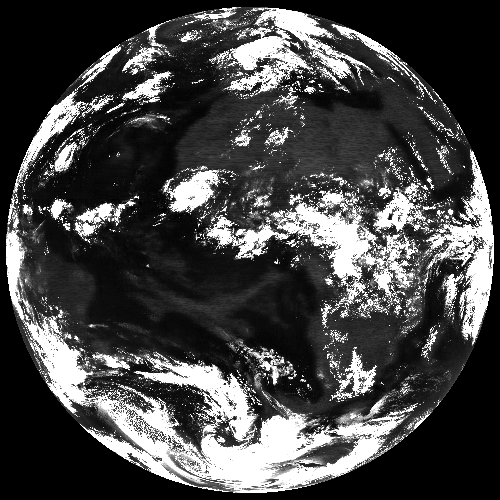

In [13]:
im1 = Image.open(output + '/013.png')
display(im1)

### Extraction des données IR_013 pour la bande rouge.

In [14]:
#Les valeurs 0 et 10 % 
#option : -ot byte: spécifie le type de données de sortie. Ici limitation à une plage de 0 à 255
#0 1000 0 255 recalibre les valeurs d epixel. Les valeurs d'entrée entre 0 et 10000 seront linéairement mise à l'chelle pour être comprises entre 0 et 255 (8bits)

In [15]:
!gdal_translate -ot byte -scale 0 1000 0 255 NETCDF:"$input":IR_013 {output}/013_scale.tif
!gdalwarp -overwrite -ts 500 500 {output}/013_scale.tif {output}/013_scale.jpg

Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
Warning 1: for band 1, nodata value has been clamped to 0, the original value being out of range.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 500P x 500L.
Using internal nodata values (e.g. 0) for image ../RESULTS/013_scale.tif.
Copying nodata values from source ../RESULTS/013_scale.tif to destination .
0...10...20...30...40...50...60...70...80...90...100 - done.


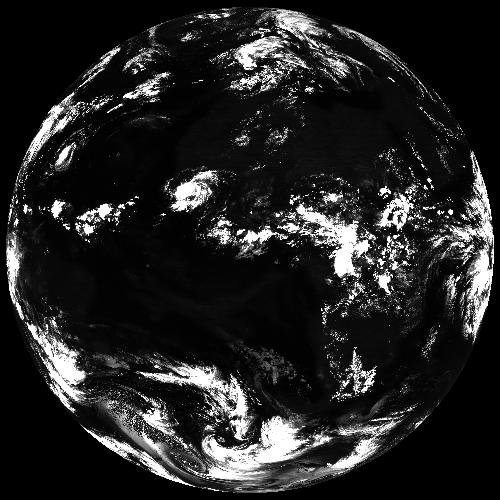

In [16]:
im2 = Image.open(output + '/013_scale.jpg')
display(im2)

Extraction des données VIS006 pour la bande verte.
Les valeurs 0 et 80 % 
Extraction des données IR 1.6 pour la bande bleue.Les valeurs 0 et 80 % 



In [17]:
!gdal_translate -ot byte -scale 0 8000 0 255 NETCDF:"$input":VIS006 {output}/006_scale.tif
!gdal_translate -ot byte -scale 0 8000 0 255 NETCDF:"$input":IR_016 {output}/016_scale.tif

Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
Warning 1: for band 1, nodata value has been clamped to 0, the original value being out of range.
0...10...20...30...40...50...60...70...80...90...100 - done.
Warning 1: dimension #1 (nx2km) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny2km) is not a Latitude/Y dimension.
Input file size is 5568, 5568
Warning 1: for band 1, nodata value has been clamped to 0, the original value being out of range.
0...10...20...30...40...50...60...70...80...90...100 - done.


### Calcul de la correction gamma avec gdal_calc.py :

Pour rappel la formule de la correction gamme est :

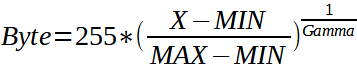


(Note : imagemagick permet de faire une correction gamma mais n'est pas compatible avec Windows)

La première étape consiste à extraire les valeurs min et max de l'image.

In [18]:
file_in = '../RESULTS/013_scale.tif'
imgpil = Image.open(file_in)  
img = np.array(imgpil)
max = np.max(img)
min = np.min(img)

Ensuite on calcule et on applique la correction gamma pour une valeur de 1.5 :

In [19]:
#Le gamma en imagerie fait référence à une correction non linéaire de la luminosité, en particulier la façon dont les tons intermédiaires (gris ou couleurs moyennes) sont rendus. 
#gamma <1 l'image devient plus sombre, ce qui peut donner plus de contraste
#gamma >1 l'image devient plus clair, ce qui peut révéler plus de détails

In [20]:
gamma= 1.5

In [21]:
!gdal_calc.py --quiet --NoDataValue 0 --overwrite -A {file_in} --calc="numpy.maximum(A*0.,{max}*((A-{min}.)/({max}-{min}))**(1/{gamma}))" --outfile {output}/013_scale_gamma.tif

In [22]:
!gdalwarp -overwrite -ts 3000 3000 {output}/013_scale_gamma.tif {output}/013_scale_gamma_HD.jpg
!gdalwarp -overwrite -ts 500 500 {output}/013_scale_gamma.tif {output}/013_scale_gamma.jpg

Creating output file that is 3000P x 3000L.
Using internal nodata values (e.g. 0) for image ../RESULTS/013_scale_gamma.tif.
Copying nodata values from source ../RESULTS/013_scale_gamma.tif to destination .
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 500P x 500L.
Using internal nodata values (e.g. 0) for image ../RESULTS/013_scale_gamma.tif.
Copying nodata values from source ../RESULTS/013_scale_gamma.tif to destination .
0...10...20...30...40...50...60...70...80...90...100 - done.


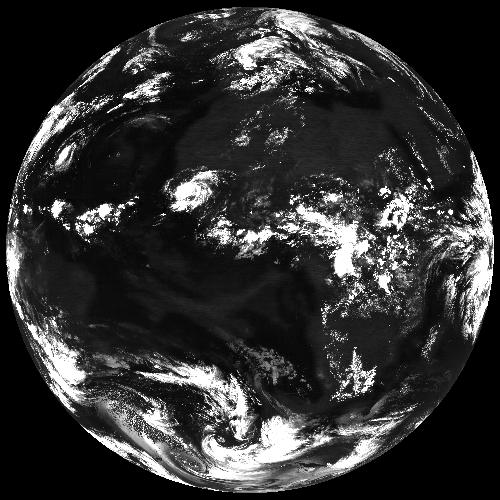

In [23]:
im3 = Image.open(output + '/013_scale_gamma.jpg')
display(im3)

In [24]:
file_in = '../RESULTS/006_scale.tif'
imgpil = Image.open(file_in)  
img = np.array(imgpil)
max = np.max(img)
min = np.min(img)

In [25]:
gamma= 0.75

In [26]:
!gdal_calc.py --quiet --NoDataValue 0 --overwrite -A {file_in} --calc="numpy.maximum(A*0.,{max}*((A-{min}.)/({max}-{min}))**(1/{gamma}))" --outfile {output}/006_scale_gamma.tif

In [27]:
!gdalwarp -overwrite -ts 500 500 {output}/006_scale_gamma.tif {output}/006_scale_gamma.jpg

Creating output file that is 500P x 500L.
Using internal nodata values (e.g. 0) for image ../RESULTS/006_scale_gamma.tif.
Copying nodata values from source ../RESULTS/006_scale_gamma.tif to destination .
0...10...20...30...40...50...60...70...80...90...100 - done.


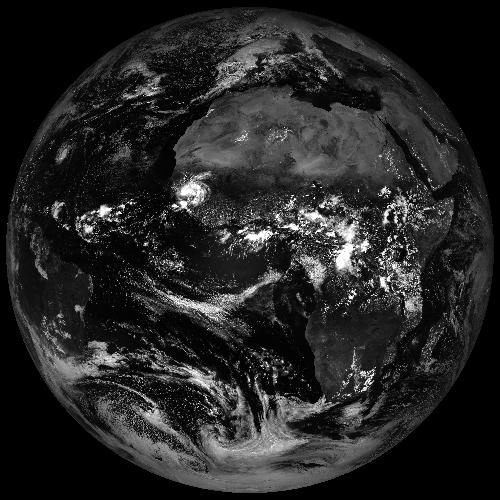

In [28]:
im4 = Image.open(output + '/006_scale_gamma.jpg')
display(im4)

In [29]:
file_in = '../RESULTS/016_scale.tif'
imgpil = Image.open(file_in)  
img = np.array(imgpil)
max = np.max(img)
min = np.min(img)

In [30]:
gamma= 1

In [31]:
!gdal_calc.py --quiet --NoDataValue 0 --overwrite -A {file_in} --calc="numpy.maximum(A*0.,{max}*((A-{min}.)/({max}-{min}))**(1/{gamma}))" --outfile {output}/016_scale_gamma.tif

In [32]:
!gdalwarp -overwrite -ts 500 500 {output}/016_scale_gamma.tif {output}/016_scale_gamma.jpg

Creating output file that is 500P x 500L.
Using internal nodata values (e.g. 0) for image ../RESULTS/016_scale_gamma.tif.
Copying nodata values from source ../RESULTS/016_scale_gamma.tif to destination .
0...10...20...30...40...50...60...70...80...90...100 - done.


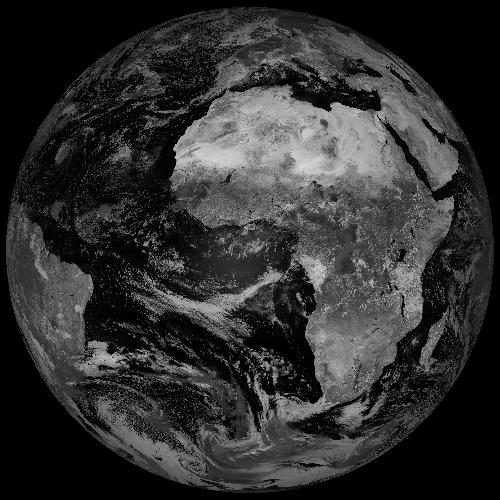

In [33]:
im5 = Image.open(output + '/016_scale_gamma.jpg')
display(im5)

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3.Fabrication de la RGB

</div>


In [34]:
!gdal_merge.py -separate {output}/013_scale_gamma.tif {output}/006_scale_gamma.tif {output}/016_scale_gamma.tif -o {output}/RGB_cloudtype.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


### Création et affichage d'une image redimmensionnée

In [35]:
!convert -resize 500 {output}/RGB_cloudtype.tif {output}/RGB_cloudtype_min.jpg  > /dev/null 2>&1 

### Visualisation du résultat

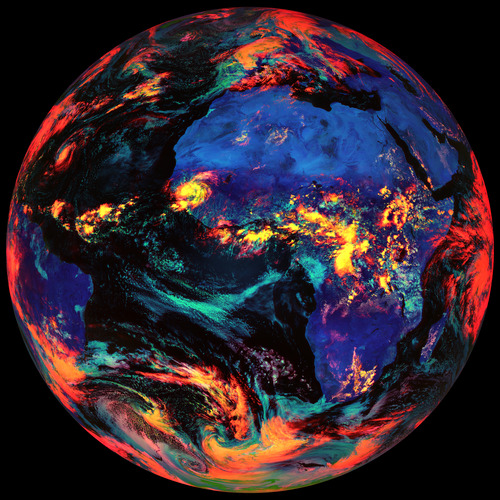

In [36]:
im6 = Image.open(output + '/RGB_cloudtype_min.jpg', 'r')
display(im6)

### Définition de la zone du zoom

In [37]:
N=40
S=15
O=-23
E=8

In [38]:
!gdalinfo {output}/RGB_cloudtype.tif

Driver: GTiff/GeoTIFF
Files: ../RESULTS/RGB_cloudtype.tif
Size is 5568, 5568
Coordinate System is:
PROJCRS["unnamed",
    BASEGEOGCRS["GCS_unamed_ellipse",
        DATUM["unknown",
            ELLIPSOID["unamed",6378169,295.488065897,
                LENGTHUNIT["metre",1,
                    ID["EPSG",9001]]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["Degree",0.0174532925199433]]],
    CONVERSION["unnamed",
        METHOD["Geostationary Satellite (Sweep Y)"],
        PARAMETER["Longitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Satellite Height",35786400,
            LENGTHUNIT["meter",1]],
        PARAMETER["False easting",0,
            LENGTHUNIT["meter",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["meter",1],
            ID["EPSG",8807]]],
    CS[Cartesian,2],
        AXIS["(E)",east,
            ORDER[1],
            LENGTHUNIT["meter",1]]

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4.Découpes et reprojections

</div>

## WGS 84 (World Geodetic System 1984): EPSG: 4326 Un système de coordonnées géographiques utilisé pour le GPS et d'autres applications géospatiales. 

In [39]:
!gdalwarp -t_srs "EPSG:4326" -te -23 0 8 40 -overwrite {output}/RGB_cloudtype.tif {output}/RGB_cloudtype_zoom.tif #W S E N

Creating output file that is 1719P x 2218L.
Processing ../RESULTS/RGB_cloudtype.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


### Création et affichage d'une image zoomée redimmensionnée

In [40]:
!convert -resize 500 {output}/RGB_cloudtype_zoom.tif {output}/RGB_cloudtype_zoom_min.jpg  > /dev/null 2>&1

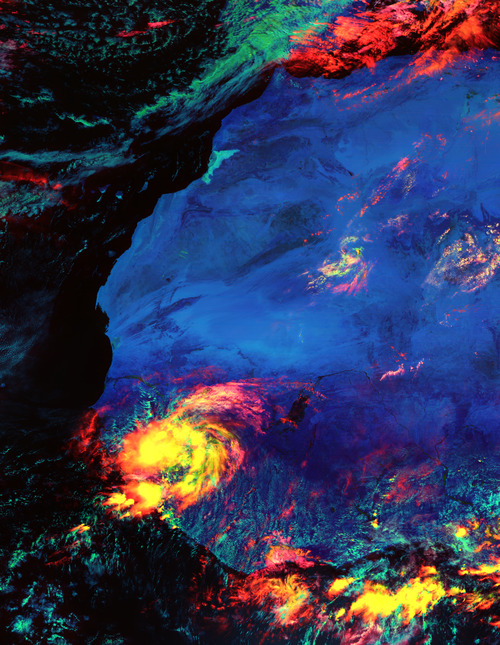

In [41]:
im7 = Image.open(output + '/RGB_cloudtype_zoom_min.jpg', 'r')
display(im7)

## Utilisation de la projection orthographique

In [42]:
#exemple sur l'europe
!rm {output}/RGB_cloudtype_zoom_ortho.tif 
!gdalwarp  -t_srs "+proj=ortho lat_0=43 lon_0=0" -ts 1600 900 -te -1720000 -990000 1720000 990000 {output}/RGB_cloudtype.tif {output}/RGB_cloudtype_zoom_ortho.tif

rm: cannot remove '../RESULTS/RGB_cloudtype_zoom_ortho.tif': No such file or directory
Creating output file that is 1600P x 900L.
Processing ../RESULTS/RGB_cloudtype.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [43]:
#Ajouts frontières
!gdal_rasterize -q -b 1 -burn 255 -b 2 -burn 255 -b 3 -burn 255 -l world-administrative-boundaries ../OUTILS/boundary/world-administrative-boundaries.shp {output}/RGB_cloudtype_zoom_ortho.tif >/dev/null 2>&1 # frontière blanche


In [44]:
!convert -resize 800 {output}/RGB_cloudtype_zoom_ortho.tif {output}/RGB_cloudtype_zoom_ortho_min.jpg


convert: Unknown field with tag 33550 (0x830e) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 33922 (0x8482) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 34735 (0x87af) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 34736 (0x87b0) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.


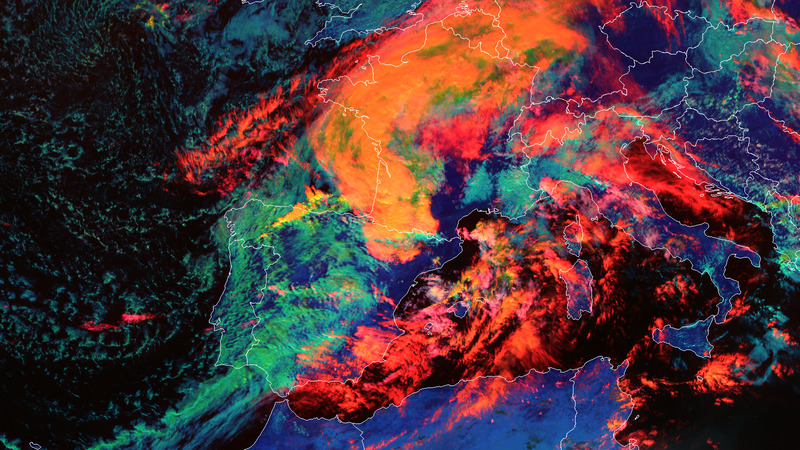

In [45]:
im8 = Image.open(output + '/RGB_cloudtype_zoom_ortho_min.jpg', 'r')
display(im8)

## Utilisation de la projection Mercator (3857)

Notez que si vous utilisez la projection Mercator, les coordonnées -te doivent être exprimées en mètres, et non plus en degrés de latitude et de longitude. 
Vous devrez donc convertir les coordonnées en mètres pour utiliser cette projection.

In [46]:
#Conversion du point en bas à gauche (x,y)
!echo -23 0 | cs2cs +init=epsg:4326 +to +init=epsg:3857

-2560348.29	0.00 0.00


In [47]:
#Conversion du point en haut à droite (x,y)
!echo 8 40 | cs2cs +init=epsg:4326 +to +init=epsg:3857

890555.93	4865942.28 0.00


In [48]:
!gdalwarp -t_srs "EPSG:3857" -te -2560348.29 0 890555.93 4865942.28 -overwrite {output}/RGB_cloudtype_zoom.tif {output}/RGB_cloudtype_zoom_3857.tif

Creating output file that is 1719P x 2424L.
Processing ../RESULTS/RGB_cloudtype_zoom.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [49]:
!convert -resize 500 {output}/RGB_cloudtype_zoom_3857.tif {output}/RGB_cloudtype_zoom_3857_min.jpg


convert: Unknown field with tag 33550 (0x830e) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 33922 (0x8482) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 34735 (0x87af) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.


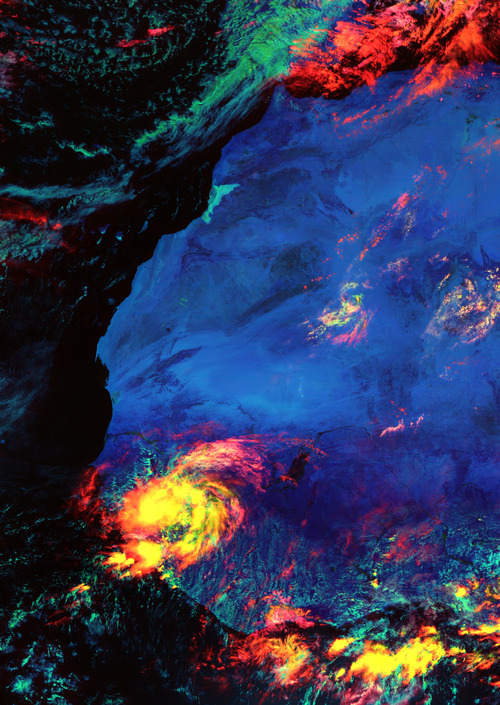

In [50]:
im9 = Image.open(output + '/RGB_cloudtype_zoom_3857_min.jpg', 'r')
display(im9)

Nettoyage

Un oeil sur l'Ouragan Leslie

In [51]:
!gdalwarp -t_srs "EPSG:4326" -te -54 16 -41 27 -overwrite {output}/RGB_cloudtype.tif {output}/RGB_cloudtype_zoom_leslie.tif #(coord W S E N)

Creating output file that is 535P x 453L.
Processing ../RESULTS/RGB_cloudtype.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [52]:
!convert -resize 800 {output}/RGB_cloudtype_zoom_leslie.tif {output}/RGB_cloudtype_zoom_leslie.jpg


convert: Unknown field with tag 33550 (0x830e) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 33922 (0x8482) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 34735 (0x87af) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 34736 (0x87b0) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.
convert: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/945.


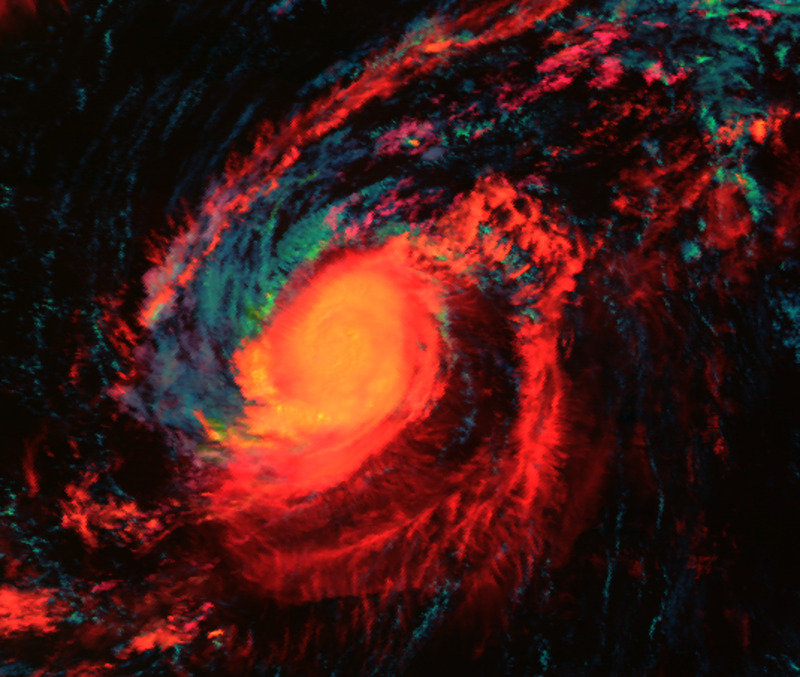

In [53]:
im10 = Image.open(output + '/RGB_cloudtype_zoom_leslie.jpg', 'r')
display(im10)

In [55]:
!rm {output}/*tif {output}/*xml

rm: cannot remove '../RESULTS/*tif': No such file or directory
